# Mercari Price Prediction

Mercari is Japan's biggest community powered shopping app where people can sell and buy a variety of brand new and used products of different brands, from sweaters to smartphones. Now Mercari would like to suggest the correct prices to the sellers but this is tough because their sellers are enabled to put just about anything, or any bundle of things on Mercari's marketplace.
So our objective is to build a model that automatically suggests the right product prices to the sellers. We are provided of the following information for each product:

train_id - the id of the product

name - the title of the product

item_condition_id - the condition of the product provided by the sellers

category_name - category of the product

brand_name - the product's brand name

shipping - 1 if shipping fee is paid by seller and 0 if shipping fee is paid by buyer

item_description - the full description of the product

price - the price that the product was sold for (This is the target variable that we will predict)

This type of problem lies under the category of Supervised Regression Machine Learning:
Supervised: We have access to both the features and the target and our goal is to train a model that can learn a mapping between the two.
Regression: The target variable, price, is a continuous variable.

# **Exploratory Data Analysis**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('train.tsv', sep='\t')
train, test = train_test_split(data, test_size=0.2, shuffle=False)
print(train.shape, test.shape)

(1186028, 8) (296507, 8)


In [7]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [12]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
missing_values_table(data)

Your selected dataframe has 8 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
brand_name,632682,42.7
category_name,6327,0.4
item_description,4,0.0


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186028 entries, 0 to 1186027
Data columns (total 8 columns):
train_id             1186028 non-null int64
name                 1186028 non-null object
item_condition_id    1186028 non-null int64
category_name        1180953 non-null object
brand_name           679756 non-null object
price                1186028 non-null float64
shipping             1186028 non-null int64
item_description     1186026 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 81.4+ MB


# **Exploratory Data Analysis**
There are a total of 8 features in this data set. The title and description of the features are follows:-

In [15]:
print('There are a total of',train.shape[0],'observations in the train data.')

There are a total of 1186028 observations in the train data.


In [16]:
train.head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


<h2> Price </h2>


In [18]:
train['price'].describe()

count    1.186028e+06
mean     2.672386e+01
std      3.844205e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

In [20]:
price = train['price'].values
price = np.sort(price, axis=None)
print('{}th percentile value is {}'.format(90, price[int(len(price)*(float(90)/100))]))

90th percentile value is 51.0


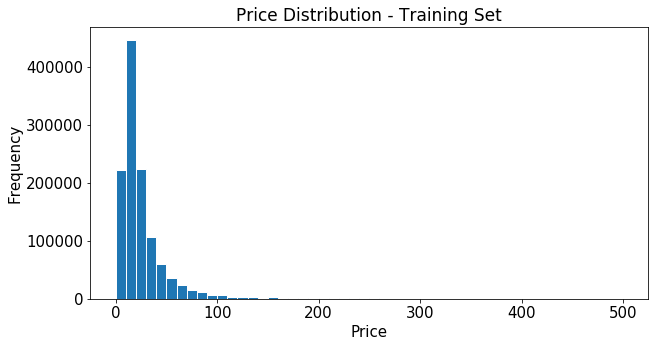

In [21]:
train['price'].plot.hist(bins=50, figsize=(10,5), edgecolor='white', range=[0,500])
plt.xlabel('Price', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tick_params(labelsize=15)
plt.title('Price Distribution - Training Set', fontsize=17)
plt.show()